In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.tsa.api as sm

In [51]:
History_Data = pd.read_excel('test.xlsx', sheet_name= 'Sheet1')

In [52]:
History_Data
Valid_Data= History_Data.dropna()
History_Data

,Obs,Quarter,Sales,Time
0,1,Q1,115.0,2010-1
1,2,Q2,90.0,2010-4
2,3,Q3,65.0,2010-7
3,4,Q4,135.0,2010-10
4,5,Q1,130.0,2011-1
5,6,Q2,95.0,2011-4
6,7,Q3,75.0,2011-7
7,8,Q4,150.0,2011-10
8,9,Q1,135.0,2012-1
9,10,Q2,105.0,2012-4


In [68]:
train=History_Data.iloc[0:8,:]
test=History_Data.iloc[8:,:]

In [69]:
train

,Obs,Quarter,Sales,Time,Timestamp
Timestamp,,,,,
2010-01-01,1,Q1,115.0,2010-1,2010-01-01
2010-04-01,2,Q2,90.0,2010-4,2010-04-01
2010-07-01,3,Q3,65.0,2010-7,2010-07-01
2010-10-01,4,Q4,135.0,2010-10,2010-10-01
2011-01-01,5,Q1,130.0,2011-1,2011-01-01
2011-04-01,6,Q2,95.0,2011-4,2011-04-01
2011-07-01,7,Q3,75.0,2011-7,2011-07-01
2011-10-01,8,Q4,150.0,2011-10,2011-10-01


In [71]:
test

,Obs,Quarter,Sales,Time,Timestamp
Timestamp,,,,,
2012-01-01,9,Q1,135.0,2012-1,2012-01-01
2012-04-01,10,Q2,105.0,2012-4,2012-04-01
2012-07-01,11,Q3,85.0,2012-7,2012-07-01
2012-10-01,12,Q4,155.0,2012-10,2012-10-01
2013-01-01,13,Q1,145.0,2013-1,2013-01-01
2013-04-01,14,Q2,110.0,2013-4,2013-04-01
2013-07-01,15,Q3,85.0,2013-7,2013-07-01
2013-10-01,16,Q4,160.0,2013-10,2013-10-01
2014-01-01,17,Q1,NaN,2014-1,2014-01-01


# Holt_winters

In [53]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm


In [72]:
History_Data['Timestamp'] = pd.to_datetime(History_Data.Time,format='%Y-%m') 
History_Data.index = History_Data.Timestamp 
train.index = train.Timestamp 
test.index = test.Timestamp 

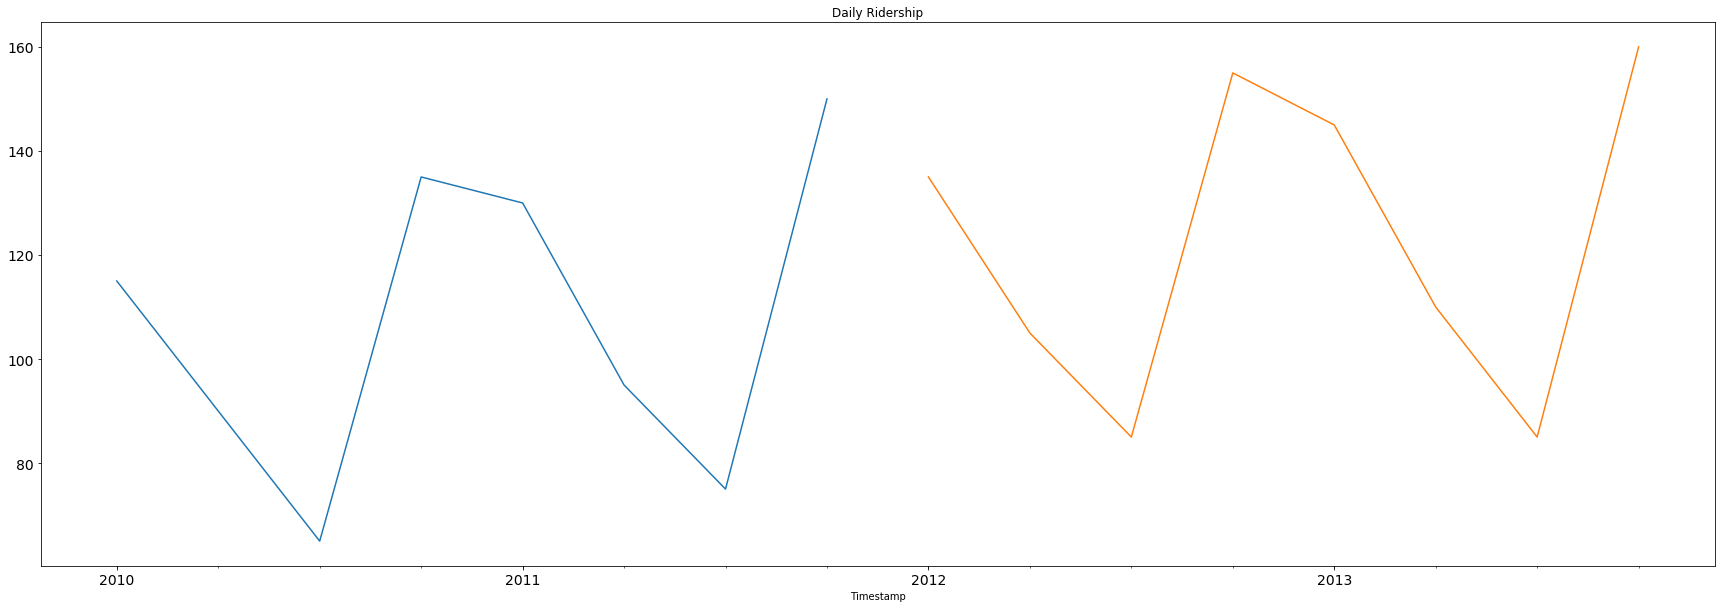

In [74]:
train['Sales'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)
test['Sales'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

In [75]:
#History_Data

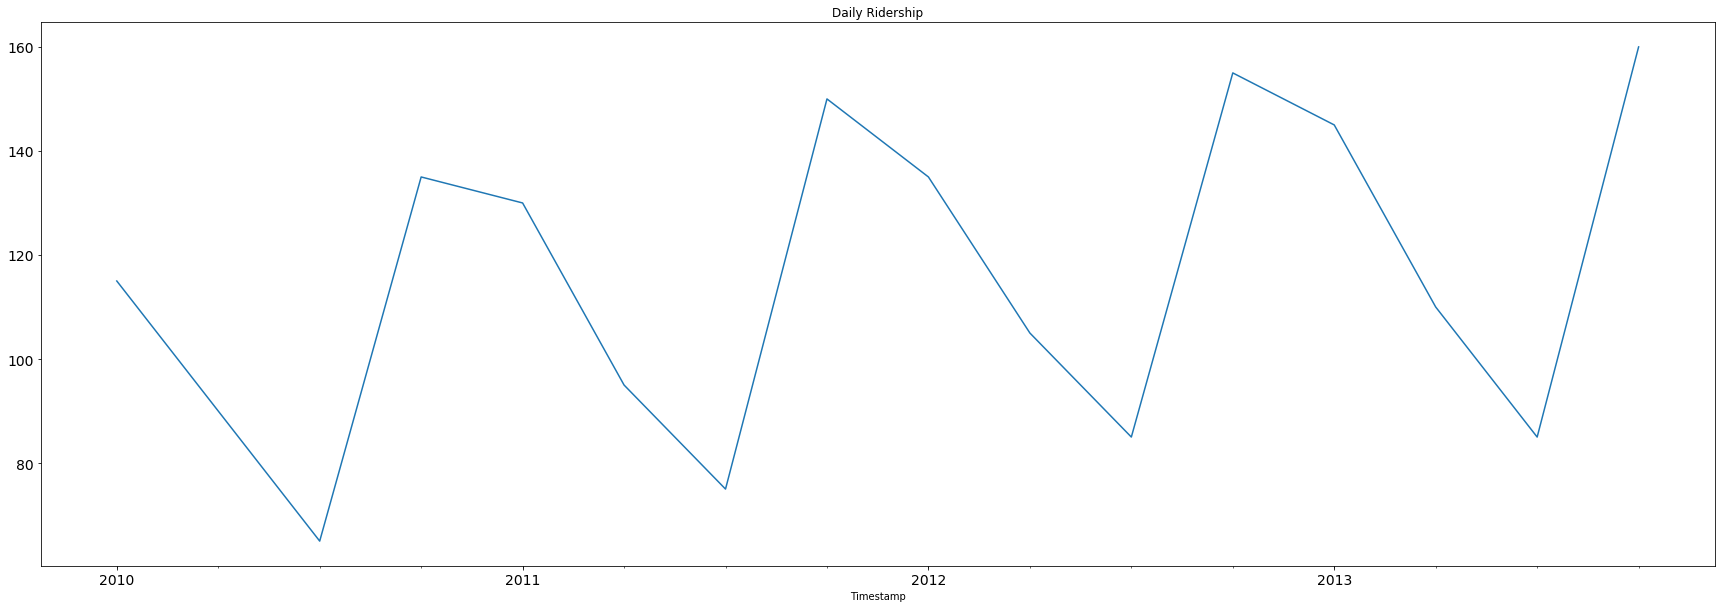

In [56]:
History_Data['Sales'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

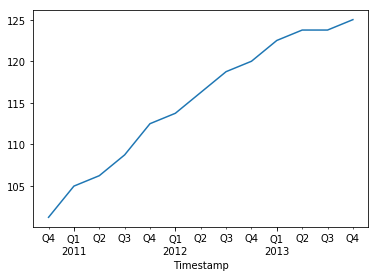

In [96]:
History_Data['Sales'].rolling(4).mean().plot()

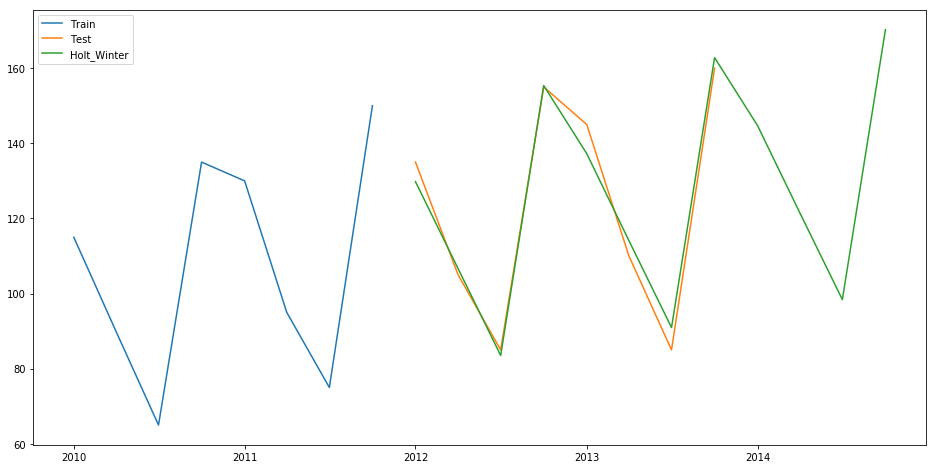

CPU times: user 298 ms, sys: 11.8 ms, total: 310 ms
Wall time: 302 ms


In [116]:
%%time
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods= 4 ,trend='additive', seasonal='additive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))

plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [64]:
y_hat_avg

,Obs,Quarter,Sales,Time,Timestamp,Holt_Winter
Timestamp,,,,,,
2010-01-01,1,Q1,115.0,2010-1,2010-01-01,NaN
2010-04-01,2,Q2,90.0,2010-4,2010-04-01,NaN
2010-07-01,3,Q3,65.0,2010-7,2010-07-01,NaN
2010-10-01,4,Q4,135.0,2010-10,2010-10-01,NaN
2011-01-01,5,Q1,130.0,2011-1,2011-01-01,NaN
2011-04-01,6,Q2,95.0,2011-4,2011-04-01,NaN
2011-07-01,7,Q3,75.0,2011-7,2011-07-01,NaN
2011-10-01,8,Q4,150.0,2011-10,2011-10-01,NaN
2012-01-01,9,Q1,135.0,2012-1,2012-01-01,NaN


# Decompse

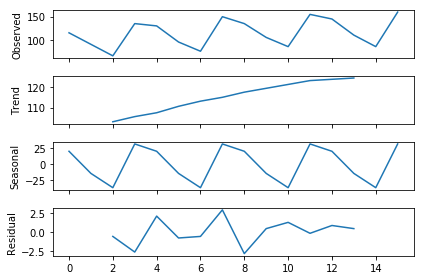

In [40]:
yearly_components = sm.seasonal_decompose(Valid_Data['Sales'], freq= 4, ).plot()

In [13]:
yearly_components = sm.seasonal_decompose(Valid_Data['Sales'], freq= 4 )

In [14]:
yearly_components.resid

0          NaN
1          NaN
2    -0.572917
3    -2.656250
4     2.135417
5    -0.781250
6    -0.572917
7     2.968750
8    -2.864583
9     0.468750
10    1.302083
11   -0.156250
12    0.885417
13    0.468750
14         NaN
15         NaN
Name: Sales, dtype: float64

In [15]:
yearly_components.seasonal

0     20.364583
1    -14.843750
2    -37.552083
3     32.031250
4     20.364583
5    -14.843750
6    -37.552083
7     32.031250
8     20.364583
9    -14.843750
10   -37.552083
11    32.031250
12    20.364583
13   -14.843750
14   -37.552083
15    32.031250
Name: Sales, dtype: float64

In [16]:
yearly_components.trend

0         NaN
1         NaN
2     103.125
3     105.625
4     107.500
5     110.625
6     113.125
7     115.000
8     117.500
9     119.375
10    121.250
11    123.125
12    123.750
13    124.375
14        NaN
15        NaN
Name: Sales, dtype: float64

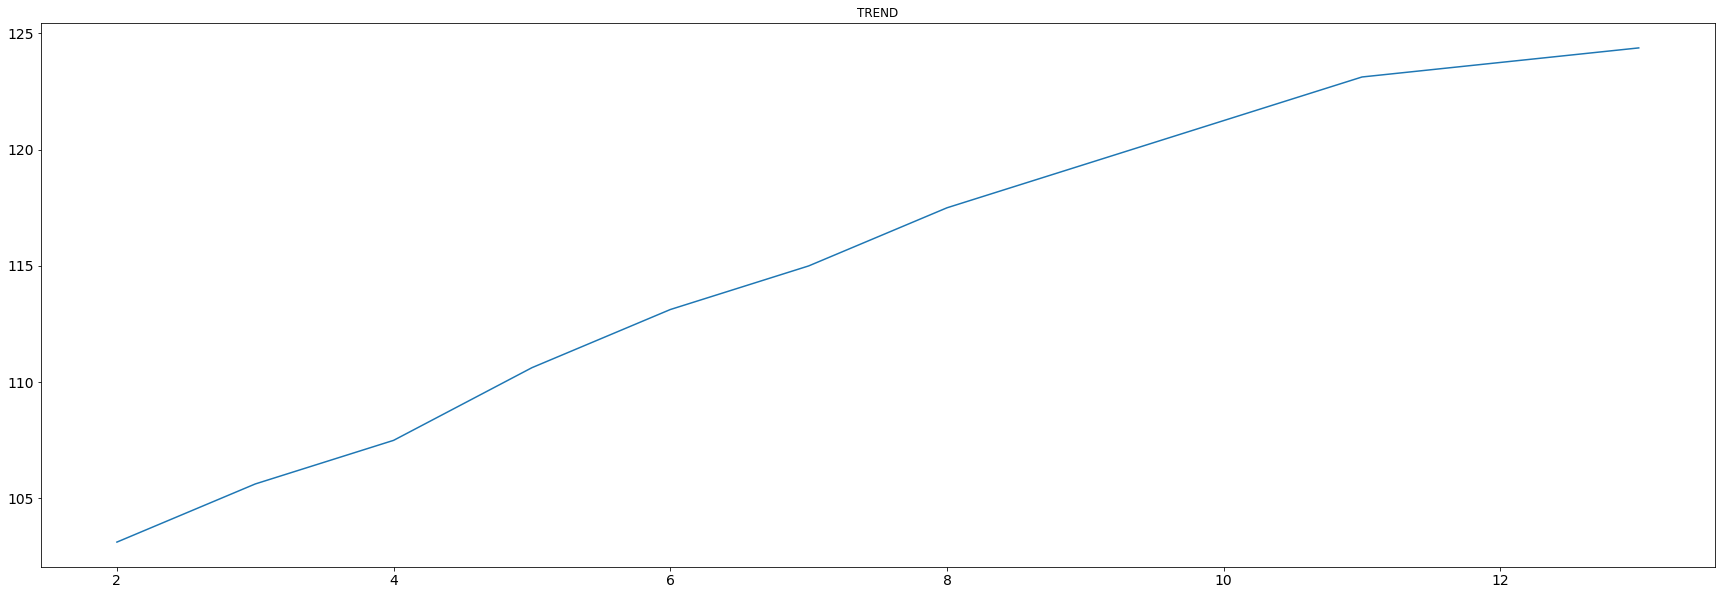

In [17]:
(yearly_components.trend).plot(figsize=(30,10), title= 'TREND', fontsize=14)

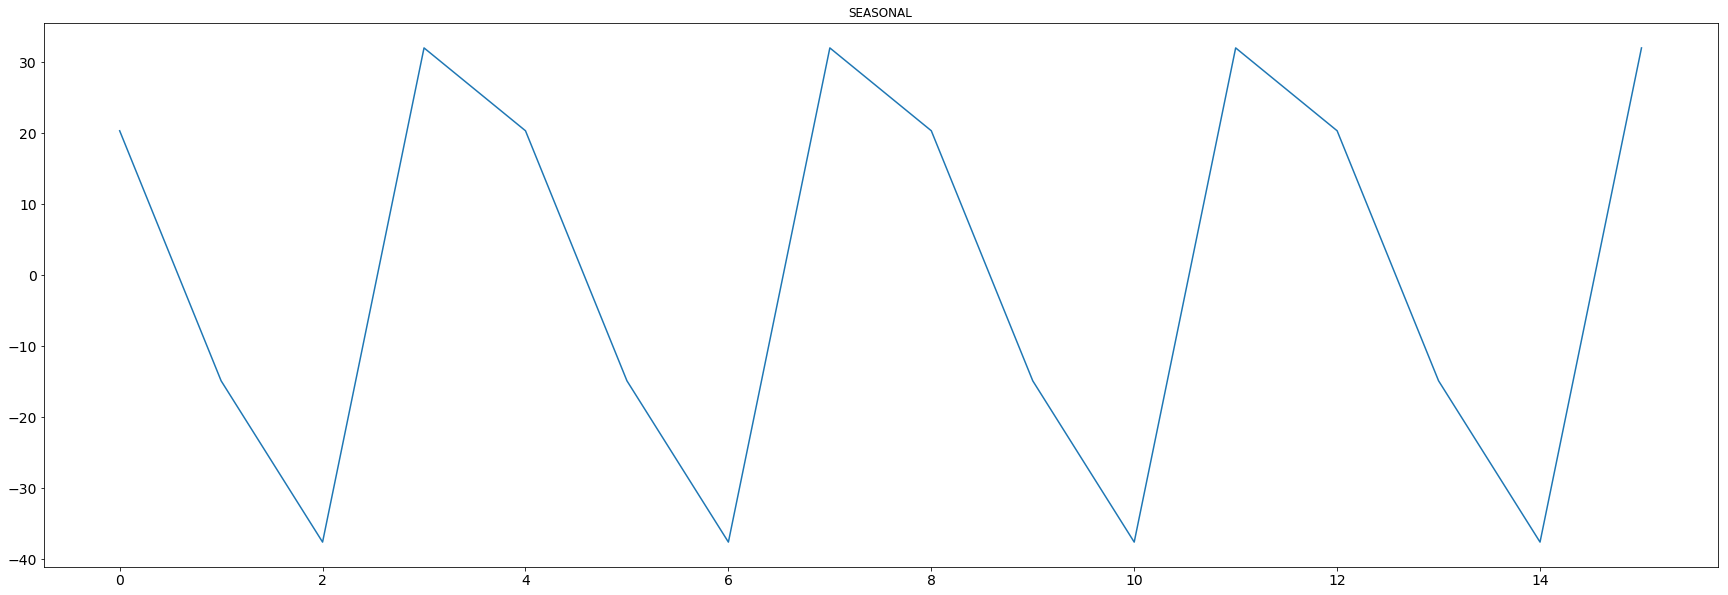

In [18]:
yearly_components.seasonal.plot(figsize=(30,10), title= 'SEASONAL', fontsize=14)

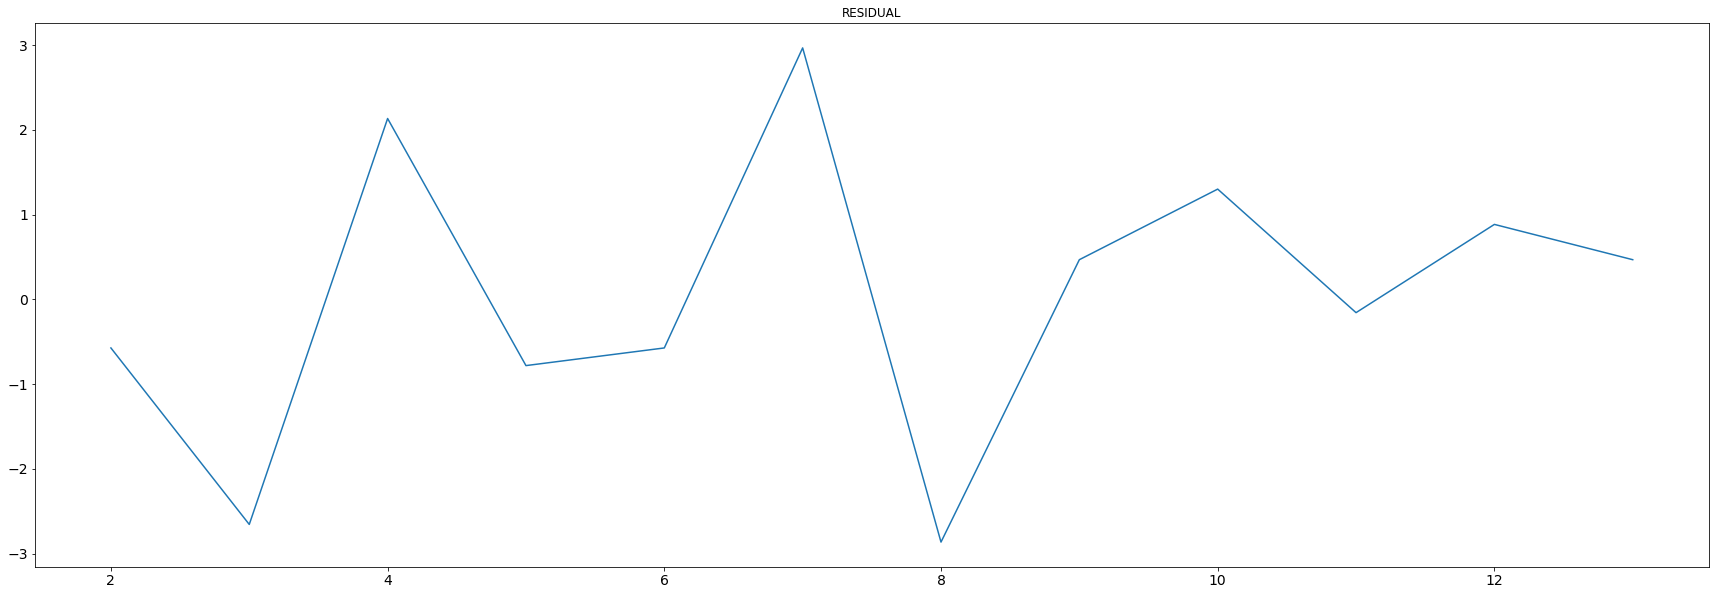

In [19]:
yearly_components.resid.plot(figsize=(30,10), title= 'RESIDUAL', fontsize=14)

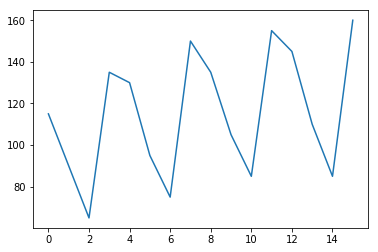

In [33]:
Valid_Data['Sales'].rolling(1).mean().plot()

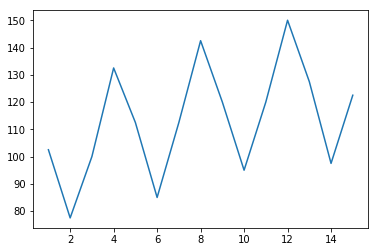

In [34]:
Valid_Data['Sales'].rolling(2).mean().plot()

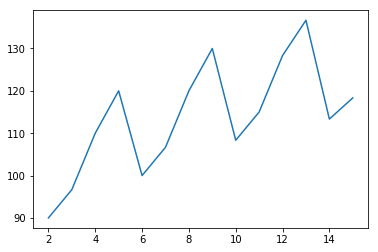

In [35]:
Valid_Data['Sales'].rolling(3).mean().plot()

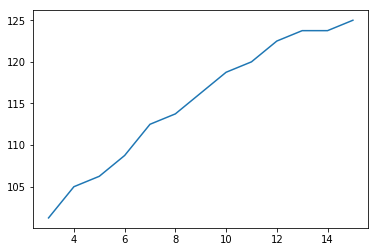

In [36]:
Valid_Data['Sales'].rolling(4).mean().plot()